In [69]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('/content/drive/MyDrive/IR_assign2/IR-assignment-2-data.txt', sep=" ", header=None)
rows = len(data.index)
db={}
rel_score={}
i=0
while (i<rows):
    if ("qid:4" == data.at[i,1]):
        db[i] = data.at[i,0]
    i+=1


def sfmaxd(data, db):
    temporary =data.drop((data.index[len(db):]))
    np.savetxt('query4max.txt', temporary.values, fmt='%s', delimiter=" ")


sfmaxd(data, db)
unsortedDb = db.items()
unsortedDb = list(unsortedDb) 

# Sorting the database for getting maxDCG
db = sorted(db.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
def findTotalFiles(db):
    db=list(db)
    count3=0
    count2=0
    count1=0
    count0=0
    lis={1,2,3}
    lis=list(lis)
    for i in db:
        vx=i[1]
        if (vx == lis[2]):
            count3+=1;
        elif (vx == lis[1]):
            count2+=1;
        elif (vx == lis[0]):
            count1+=1;
        else:
            count0+=1;
    faclis=[]
    # ans=math.factorial(count3)*math.factorial(count2)*math.factorial(count1)*math.factorial(count0)
    for i in range(4):
      if(i==1):
        faclis.append(math.factorial(count3))
      elif(i==2):
        faclis.append(math.factorial(count2))
      elif(i==3):
        faclis.append(math.factorial(count1))
      else:
        faclis.append(math.factorial(count0))
    
    ans=faclis[0]*faclis[1]*faclis[2]*faclis[3]
    # print(ans)
    return ans

totalfiles=findTotalFiles(db)
print("total files: ",totalfiles)

total files:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


In [78]:
def findDCG(data, length):
    ans = data[0][1];
    i=1
    while(i<length):
      xx=data[i][1]
      vx=math.log2(i+1)
      temporary=(xx/vx)
      ans=ans+temporary
      i=i+1 
    return ans   

In [79]:
def findAlternativeDCG(data):
    maxdcg1= 0
    i=1
    for val in db:
        ks=pow(2,int(val[1]))
        ks=ks-1
        vals=ks/(np.log2(i+1))
        maxdcg1= maxdcg1+vals
        i=i+1
    return maxdcg1


In [80]:
maxdcgval = findDCG(db, len(db))
unsortedcgval = findDCG(unsortedDb, len(unsortedDb))
maxdcgval_50 = findDCG(db, 51)
unsortedcgval_50 = findDCG(unsortedDb, 51)
vk1=unsortedcgval_50/maxdcgval_50
vk2=unsortedcgval/maxdcgval

print("Max DCG: {}".format(maxdcgval))
print("AT 50: {}".format(vk1))
print(" Complete Dataset: {}".format(vk2)) 

Max DCG: 20.989750804831445
AT 50: 0.3521042740324887
 Complete Dataset: 0.5979226516897831


In [81]:
def plotter(recall, precision):
    plt.plot(recall, precision)
    plt.ylabel('precision')
    plt.xlabel('recall')
    plt.title('precs-recall graph')
    plt.show()

def getreltfpair(db):
    i=0
    while i<rows:
        if (data.at[i,1] == "qid:4"):
            ss = float(data.at[i,76][3:])
            qr=data.at[i,0]
            temporary = (ss,qr)
            db[i] = temporary
        i+=1


def getPrecisionAndRecall(rel_tf_pairs):
    sortedByTF = sorted(rel_tf_pairs.items(), key = lambda kv:(kv[1], kv[0]), reverse = True)
    totalDocs = 103
    ttrdocs= 44
    rrdocs = 0
    precision = []
    recall = []
    i=0
    ll=len(sortedByTF)
    
    while (i<ll):
        valss=sortedByTF[i][1][1]
        if (valss!=0):
            rrdocs-=-1
        calc=rrdocs/(i+1)
        precision.append(calc)
        calc1=rrdocs/ttrdocs
        recall.append(calc1)
        i+=1
    plotter(recall, precision)

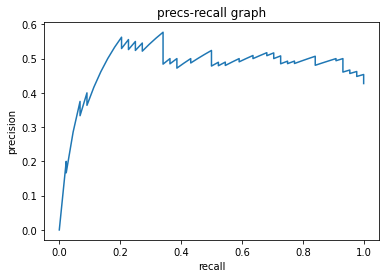

In [82]:
rel_tf_pairs = {}    # Database for storing Relevance and tf-idf pairs
getreltfpair(rel_tf_pairs)
getPrecisionAndRecall(rel_tf_pairs)
